In [1]:
from google.colab import drive
drive.mount('/gdrive/')
%cd /gdrive

Mounted at /gdrive/
/gdrive


In [2]:
ls

MyDrive/  Shareddrives/


In [3]:
cd /gdrive/MyDrive/Fetal_health

/gdrive/MyDrive/Fetal_health


In [4]:
ls

fetal_health.csv


# Importing Libraries

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier as rf
import warnings
warnings.filterwarnings("ignore")

# Uploading Dataset

In [7]:
df=pd.read_csv('fetal_health.csv')
df.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

In [9]:
df.describe()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.00000,...,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000
mean,133.303857,0.003178,0.009481,0.004366,0.001889,0.000003,0.000159,46.990122,1.332785,9.84666,...,93.579492,164.025400,4.068203,0.323612,137.452023,134.610536,138.090310,18.808090,0.320320,1.304327
std,9.840844,0.003866,0.046666,0.002946,0.002960,0.000057,0.000590,17.192814,0.883241,18.39688,...,29.560212,17.944183,2.949386,0.706059,16.381289,15.593596,14.466589,28.977636,0.610829,0.614377
min,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.200000,0.00000,...,50.000000,122.000000,0.000000,0.000000,60.000000,73.000000,77.000000,0.000000,-1.000000,1.000000
25%,126.000000,0.000000,0.000000,0.002000,0.000000,0.000000,0.000000,32.000000,0.700000,0.00000,...,67.000000,152.000000,2.000000,0.000000,129.000000,125.000000,129.000000,2.000000,0.000000,1.000000
50%,133.000000,0.002000,0.000000,0.004000,0.000000,0.000000,0.000000,49.000000,1.200000,0.00000,...,93.000000,162.000000,3.000000,0.000000,139.000000,136.000000,139.000000,7.000000,0.000000,1.000000
75%,140.000000,0.006000,0.003000,0.007000,0.003000,0.000000,0.000000,61.000000,1.700000,11.00000,...,120.000000,174.000000,6.000000,0.000000,148.000000,145.000000,148.000000,24.000000,1.000000,1.000000
max,160.000000,0.019000,0.481000,0.015000,0.015000,0.001000,0.005000,87.000000,7.000000,91.00000,...,159.000000,238.000000,18.000000,10.000000,187.000000,182.000000,186.000000,269.000000,1.000000,3.000000


# EDA

In [10]:
df.isna().sum().sum()

0

In [11]:
df.columns

Index(['baseline value', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations', 'severe_decelerations',
       'prolongued_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability', 'histogram_width',
       'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
       'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean',
       'histogram_median', 'histogram_variance', 'histogram_tendency',
       'fetal_health'],
      dtype='object')

In [12]:
df.fetal_health.value_counts()

1.0    1655
2.0     295
3.0     176
Name: fetal_health, dtype: int64

In [13]:
columns = df.columns
binary_cols = []

for col in columns:
    if df[col].value_counts().shape[0] == 2:
        binary_cols.append(col)

In [14]:
binary_cols

['severe_decelerations']

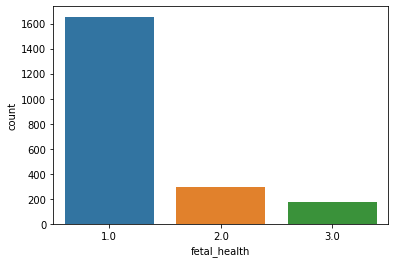

In [15]:
sns.countplot("fetal_health", data=df)

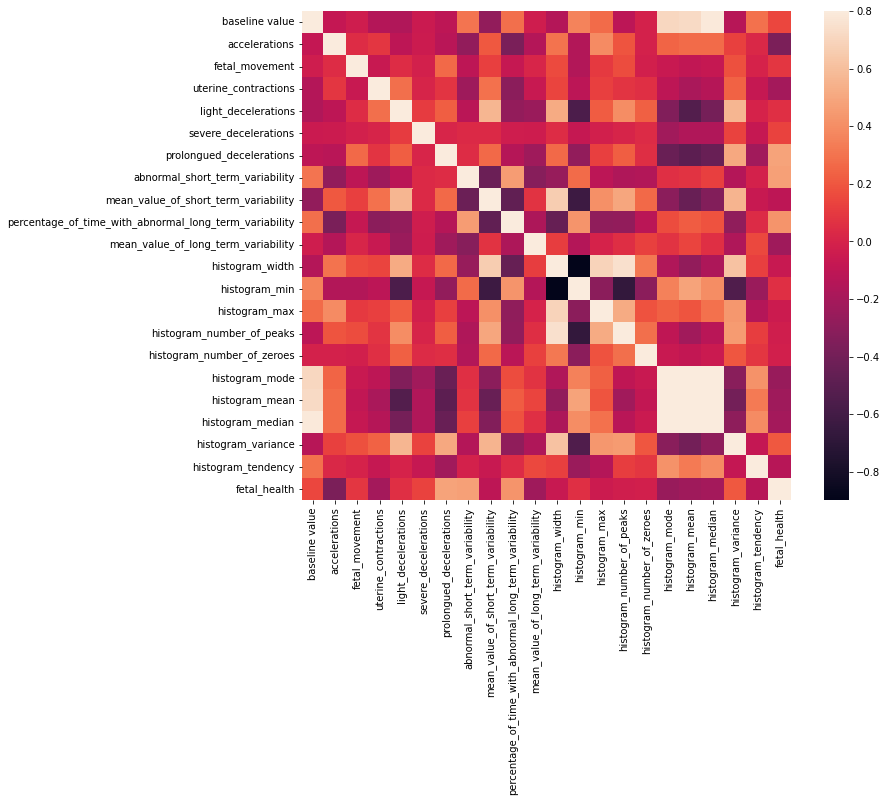

In [16]:
corrmat = df.corr()
fig = plt.figure(figsize = (12, 9))
sns.heatmap(corrmat, vmax = .8, square = True)
plt.show()

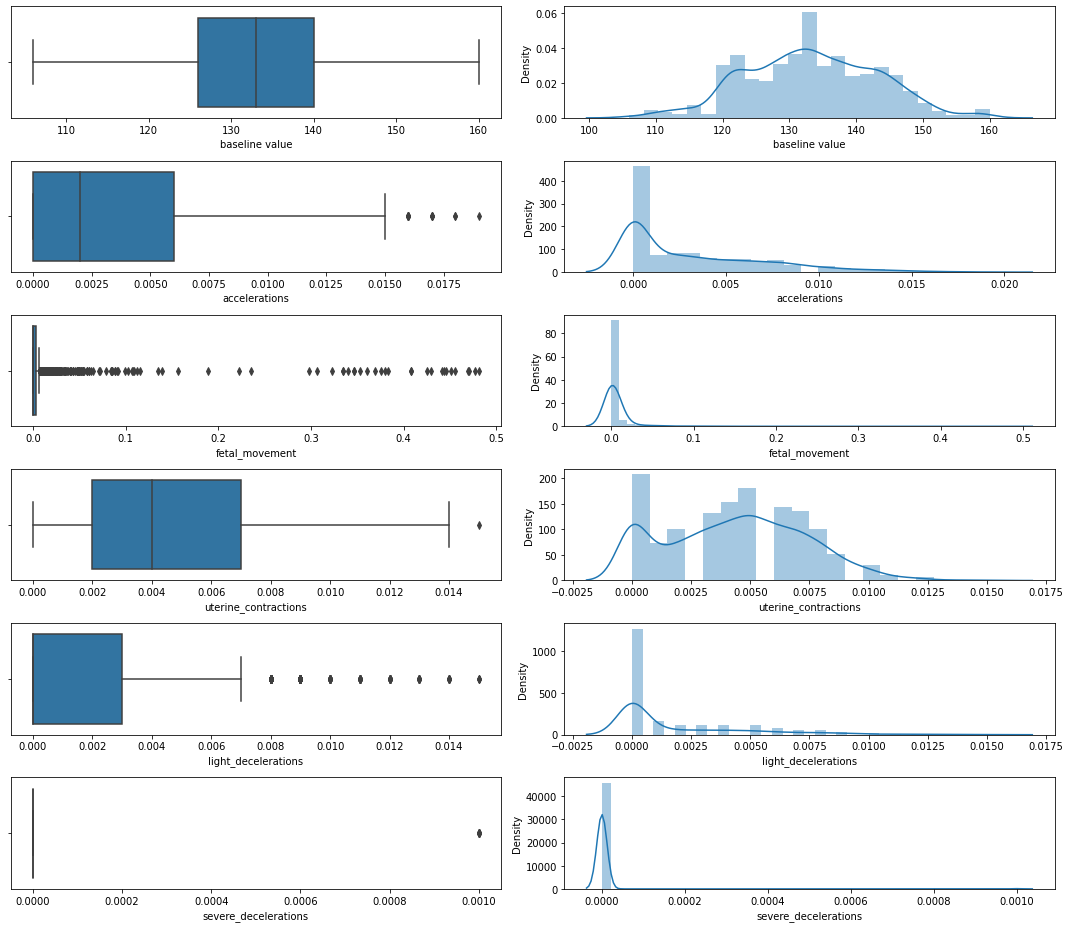

In [17]:
fig, ax = plt.subplots(6, 2, figsize = (15, 13))
sns.boxplot(x= df["baseline value"], ax = ax[0,0])
sns.distplot(df['baseline value'], ax = ax[0,1])
sns.boxplot(x= df["accelerations"], ax = ax[1,0])
sns.distplot(df['accelerations'], ax = ax[1,1])
sns.boxplot(x= df["fetal_movement"], ax = ax[2,0])
sns.distplot(df['fetal_movement'], ax = ax[2,1])
sns.boxplot(x= df["uterine_contractions"], ax = ax[3,0])
sns.distplot(df['uterine_contractions'], ax = ax[3,1])
sns.boxplot(x= df["light_decelerations"], ax = ax[4,0])
sns.distplot(df['light_decelerations'], ax = ax[4,1])
sns.boxplot(x= df["severe_decelerations"], ax = ax[5,0])
sns.distplot(df['severe_decelerations'], ax = ax[5,1])
plt.tight_layout()

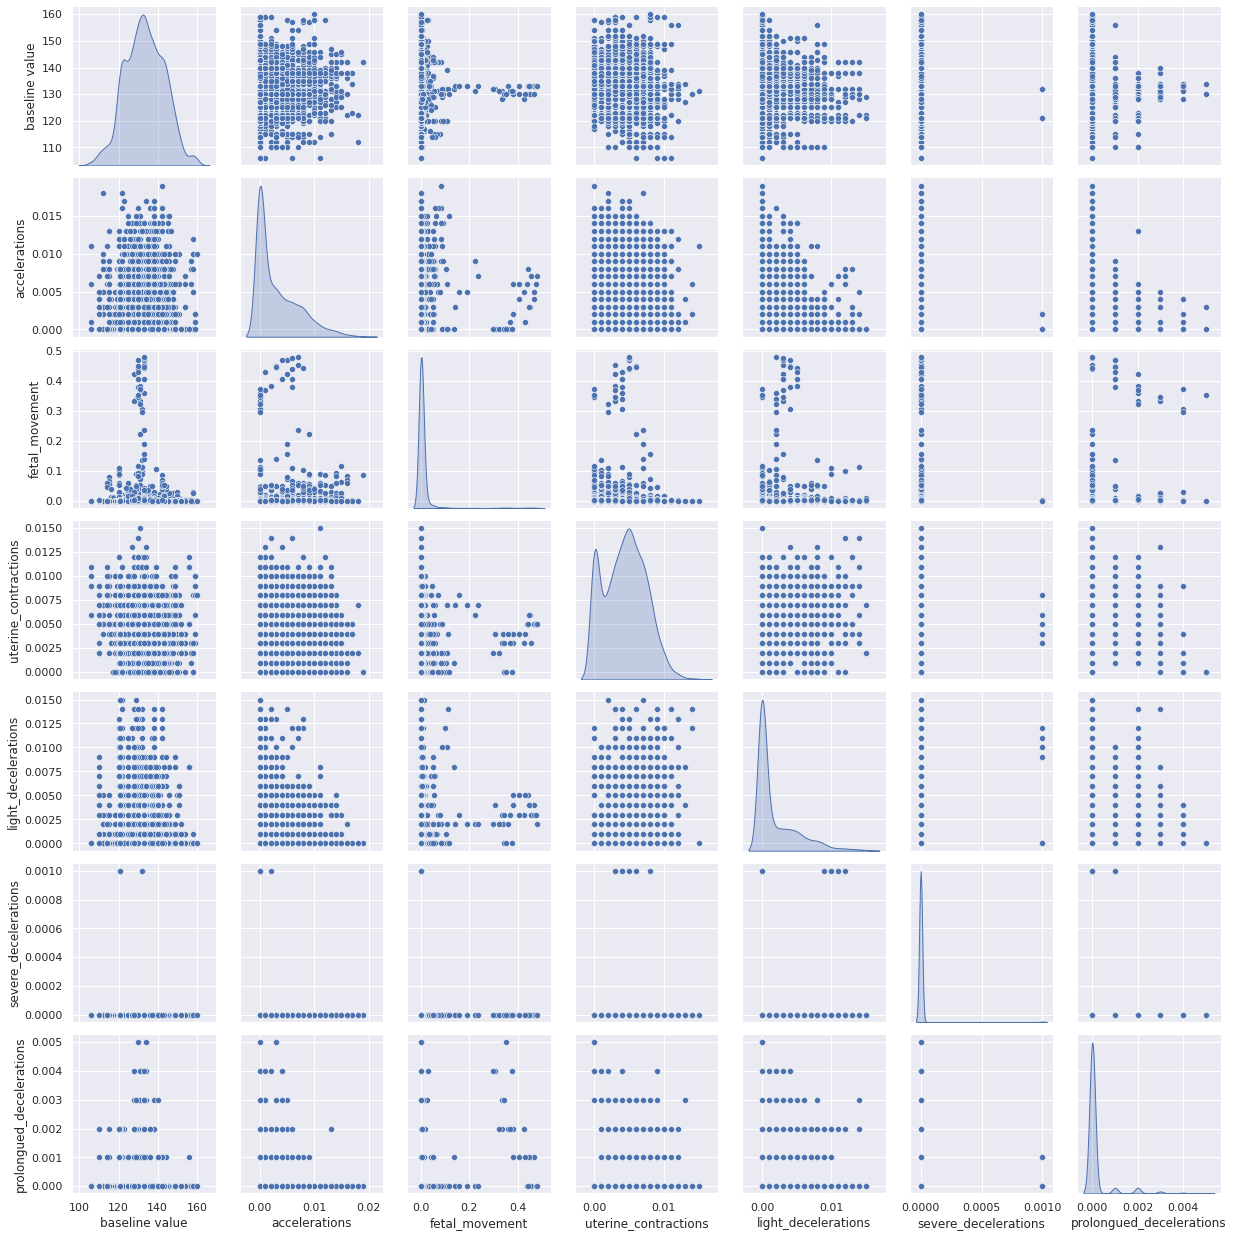

In [18]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
cData_attr = df.iloc[:, 0:7]
sns.pairplot(cData_attr, diag_kind='kde')   

Text(0, 0.5, 'light_decelerations')

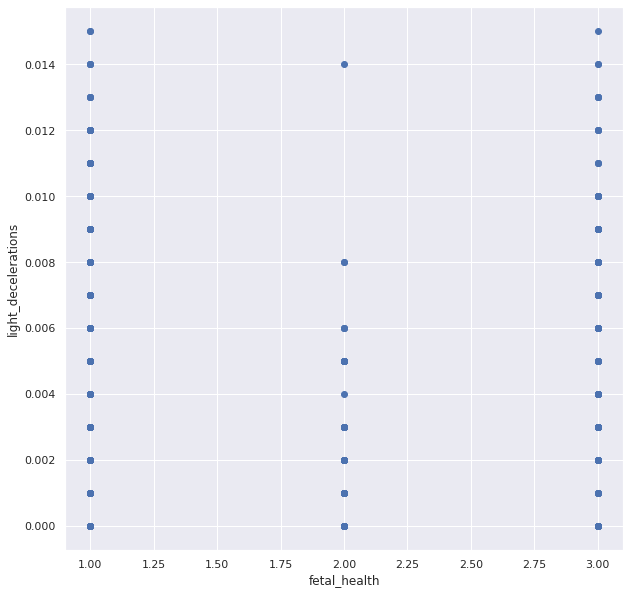

In [19]:
plt.figure(figsize=(10,10))
plt.scatter(x='fetal_health',y='light_decelerations',data=df)
plt.xlabel('fetal_health')
plt.ylabel('light_decelerations')

Text(0, 0.5, 'uterine_contractions')

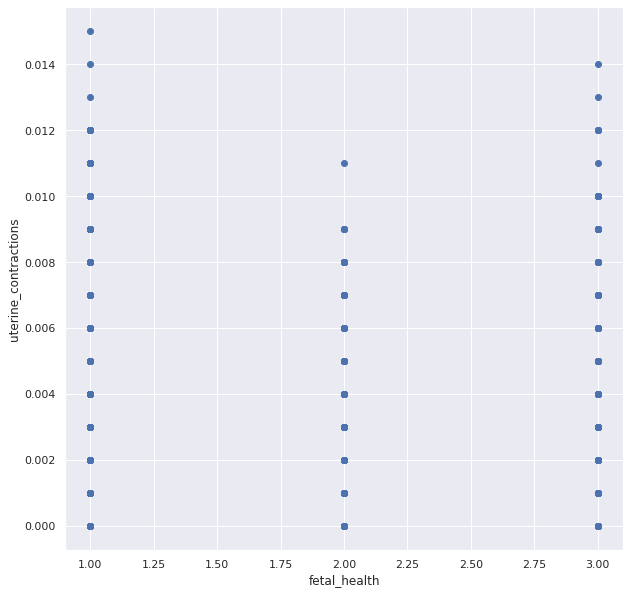

In [20]:
plt.figure(figsize=(10,10))
plt.scatter(x='fetal_health',y='uterine_contractions',data=df)
plt.xlabel('fetal_health')
plt.ylabel('uterine_contractions')

Text(0, 0.5, 'baseline value')

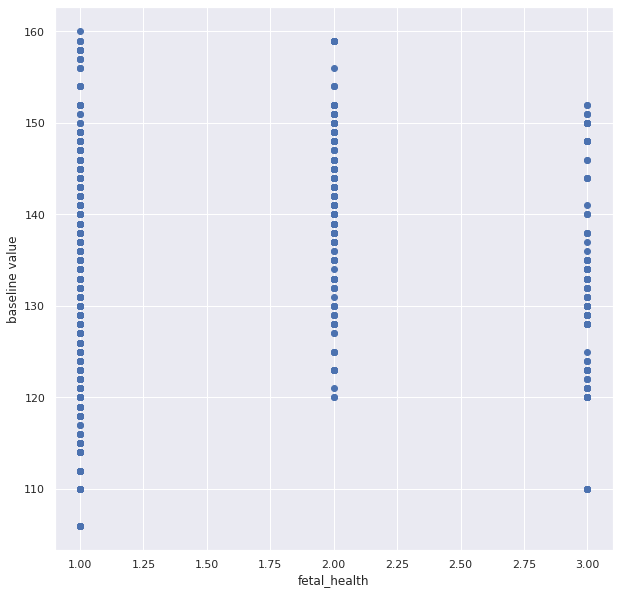

In [21]:
plt.figure(figsize=(10,10))
plt.scatter(x='fetal_health',y='baseline value',data=df)
plt.xlabel('fetal_health')
plt.ylabel('baseline value')

In [22]:
X = df.drop(['fetal_health'], axis = 1)
Y = df["fetal_health"]
x_Data = X.values
y_Data = Y.values

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X_train, X_test, y_train, y_test = train_test_split(x_Data, y_Data, test_size = 0.2, random_state = 42)

# Naive Bayes

In [25]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train,y_train)

GaussianNB()

In [26]:
model.score(X_test,y_test)

0.8028169014084507

In [27]:
from sklearn.model_selection import cross_val_score
print(cross_val_score(GaussianNB(),X_train, y_train, cv=5))

[0.8        0.80882353 0.81764706 0.80588235 0.85588235]


In [28]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [29]:
pred = model.predict(X_train) 
accuracy_score(y_train, pred)

0.8176470588235294

In [30]:
confusion_matrix(y_train, pred)

array([[1103,  165,   54],
       [  29,  191,   11],
       [   8,   43,   96]])

In [31]:
predicted_test = model.predict(X_test)
p=accuracy_score(y_test, predicted_test)

In [32]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score

In [33]:
print(classification_report(y_test, predicted_test))

              precision    recall  f1-score   support

         1.0       0.97      0.80      0.88       333
         2.0       0.50      0.89      0.64        64
         3.0       0.47      0.66      0.55        29

    accuracy                           0.80       426
   macro avg       0.65      0.78      0.69       426
weighted avg       0.87      0.80      0.82       426



In [35]:
cma = confusion_matrix(y_test, predicted_test)

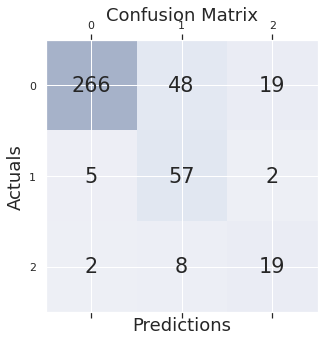

In [36]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cma, cmap=plt.cm.Blues, alpha=0.3)
for i in range(cma.shape[0]):
    for j in range(cma.shape[1]):
        ax.text(x=j, y=i,s=cma[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

# Random forest Classifier

In [37]:
clf_forest = rf(n_estimators=100, max_depth=10)
clf_forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=10)

In [38]:
pred = clf_forest.predict(X_train)
accuracy_score(y_train, pred)

0.9941176470588236

In [39]:
confusion_matrix(y_train, pred)

array([[1321,    1,    0],
       [   9,  222,    0],
       [   0,    0,  147]])

In [40]:
pred_test = clf_forest.predict(X_test)
q=accuracy_score(y_test, pred_test)

In [41]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score

In [42]:
print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

         1.0       0.96      0.98      0.97       333
         2.0       0.88      0.80      0.84        64
         3.0       0.90      0.93      0.92        29

    accuracy                           0.95       426
   macro avg       0.91      0.90      0.91       426
weighted avg       0.95      0.95      0.95       426



In [43]:
cma = confusion_matrix(y_test, pred_test)

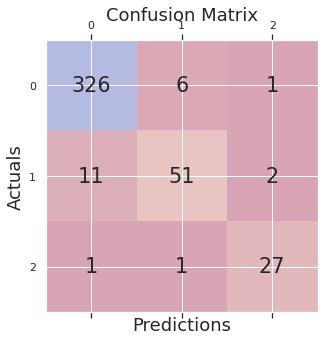

In [44]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cma, cmap ="coolwarm_r", alpha=0.3)
for i in range(cma.shape[0]):
    for j in range(cma.shape[1]):
        ax.text(x=j, y=i,s=cma[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

# Decision Tree Classifier

In [45]:
from sklearn import tree

In [46]:
 clf = tree.DecisionTreeClassifier()
 clf = clf.fit(X_train, y_train)

In [47]:
pred1 = clf.predict(X_train)
accuracy_score(y_train, pred1)

1.0

In [48]:
confusion_matrix(y_train, pred1)

array([[1322,    0,    0],
       [   0,  231,    0],
       [   0,    0,  147]])

In [49]:
pred1_test = clf.predict(X_test)
r=accuracy_score(y_test, pred1_test)

In [50]:
print(classification_report(y_test, pred1_test))

              precision    recall  f1-score   support

         1.0       0.96      0.94      0.95       333
         2.0       0.77      0.80      0.78        64
         3.0       0.84      0.93      0.89        29

    accuracy                           0.92       426
   macro avg       0.86      0.89      0.87       426
weighted avg       0.92      0.92      0.92       426



In [51]:
cma = confusion_matrix(y_test, pred1_test)

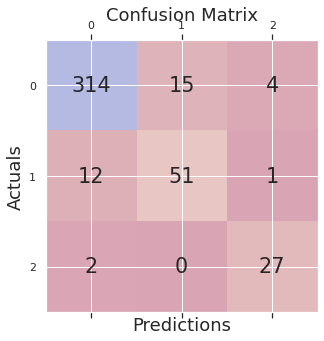

In [52]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cma, cmap ="coolwarm_r", alpha=0.3)
for i in range(cma.shape[0]):
    for j in range(cma.shape[1]):
        ax.text(x=j, y=i,s=cma[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

# Logistic Regression

In [53]:
from sklearn.linear_model import LogisticRegression  
clf= LogisticRegression(random_state=0)  
clf.fit(X_train, y_train)  

LogisticRegression(random_state=0)

In [54]:
pred_LR= clf.predict(X_train)
accuracy_score(y_train, pred_LR)

0.861764705882353

In [55]:
confusion_matrix(y_train, pred_LR)

array([[1271,   33,   18],
       [ 136,   87,    8],
       [  16,   24,  107]])

In [56]:
pred_LR_test = clf.predict(X_test)
s=accuracy_score(y_test, pred_LR_test)

In [57]:
print(classification_report(y_test, pred_LR_test))

              precision    recall  f1-score   support

         1.0       0.90      0.95      0.93       333
         2.0       0.70      0.47      0.56        64
         3.0       0.73      0.76      0.75        29

    accuracy                           0.87       426
   macro avg       0.78      0.73      0.74       426
weighted avg       0.86      0.87      0.86       426



In [58]:
cma = confusion_matrix(y_test, pred_LR_test)

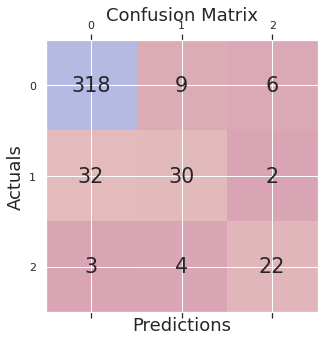

In [59]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cma, cmap ="coolwarm_r", alpha=0.3)
for i in range(cma.shape[0]):
    for j in range(cma.shape[1]):
        ax.text(x=j, y=i,s=cma[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

# Support Vector Machine

In [60]:
from sklearn.svm import SVC  
classifier = SVC(kernel='linear', random_state=0)  
classifier.fit(X_train, y_train)  

SVC(kernel='linear', random_state=0)

In [61]:
pred_SVM= classifier.predict(X_train)
accuracy_score(y_train, pred_SVM)

0.888235294117647

In [62]:
confusion_matrix(y_train, pred_SVM)

array([[1269,   42,   11],
       [  97,  121,   13],
       [  11,   16,  120]])

In [63]:
pred_SVM_test = classifier.predict(X_test)
t=accuracy_score(y_test, pred_SVM_test)

In [64]:
print(classification_report(y_test, pred_SVM_test))

              precision    recall  f1-score   support

         1.0       0.93      0.95      0.94       333
         2.0       0.63      0.53      0.58        64
         3.0       0.71      0.76      0.73        29

    accuracy                           0.87       426
   macro avg       0.76      0.75      0.75       426
weighted avg       0.87      0.87      0.87       426



In [65]:
cma = confusion_matrix(y_test, pred_SVM_test)

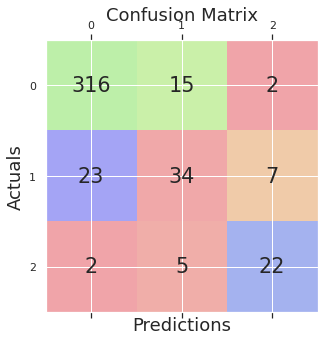

In [66]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cma, cmap ="prism", alpha=0.3)
for i in range(cma.shape[0]):
    for j in range(cma.shape[1]):
        ax.text(x=j, y=i,s=cma[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

# Neural networks

In [69]:
from sklearn.neural_network import MLPClassifier

In [71]:
clf= MLPClassifier(solver='lbfgs', alpha=1e-5,
           hidden_layer_sizes=(5, 2), random_state=1)
clf.fit(X_train, y_train)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(5, 2), random_state=1,
              solver='lbfgs')

In [72]:
pred_NN= clf.predict(X_train)
accuracy_score(y_train, pred_NN)

0.8388235294117647

In [73]:
confusion_matrix(y_train, pred_SVM)

array([[1269,   42,   11],
       [  97,  121,   13],
       [  11,   16,  120]])

In [78]:
pred_NN_test = clf.predict(X_test)
u=accuracy_score(y_test, pred_NN_test)

In [79]:
print(classification_report(y_test, pred_NN_test))

              precision    recall  f1-score   support

         1.0       0.86      0.97      0.91       333
         2.0       0.64      0.22      0.33        64
         3.0       0.80      0.83      0.81        29

    accuracy                           0.85       426
   macro avg       0.77      0.67      0.68       426
weighted avg       0.83      0.85      0.82       426



In [80]:
cma = confusion_matrix(y_test, pred_NN_test)

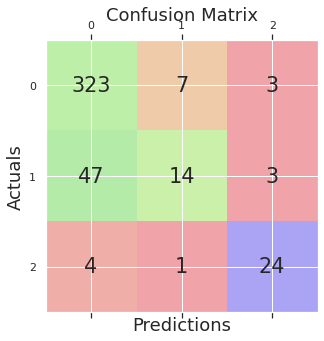

In [81]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cma, cmap ="prism", alpha=0.3)
for i in range(cma.shape[0]):
    for j in range(cma.shape[1]):
        ax.text(x=j, y=i,s=cma[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

# Comparative predicting

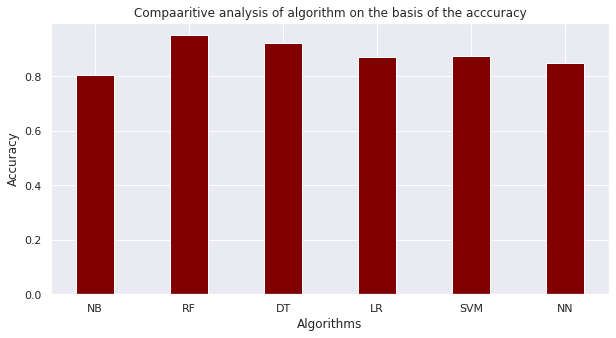

In [82]:
import numpy as np
import matplotlib.pyplot as plt
# creating the dataset
data = {'NB':p, 'RF':q, 'DT':r,'LR':s,'SVM':t,'NN':u}
courses = list(data.keys())
values = list(data.values())
fig = plt.figure(figsize = (10, 5))
# creating the bar plot
plt.bar(courses, values, color ='maroon',
		width = 0.4)
plt.xlabel("Algorithms")
plt.ylabel("Accuracy")
plt.title("Compaaritive analysis of algorithm on the basis of the acccuracy")
plt.show()


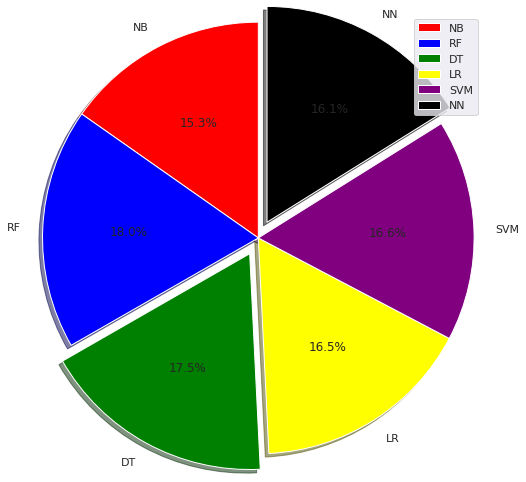

In [83]:
activities = ['NB', 'RF', 'DT', 'LR','SVM','NN'] 
# portion covered by each label
slices = [p,q,r,s,t,u]
 
# color for each label
colors = ['red', 'blue', 'green','yellow','purple','black']
 
# plotting the pie chart
plt.pie(slices, labels = activities, colors=colors,
        startangle=90, shadow = True, explode = (0, 0, 0.1,0,0,0.1),
        radius = 1.2, autopct = '%1.1f%%')
 
# plotting legend
plt.legend()
 
# showing the plot
plt.show()